## Notebook -1 
#### This notebook consist with the Data Acquisition and handling the null values in order to cleaan the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\user\\OneDrive\\Desktop\\FINAL_THESIS'

In [4]:
cd C:\\Users\\user\\OneDrive\\Desktop\\CSV files

C:\Users\user\OneDrive\Desktop\CSV files


In [5]:
df = pd.read_csv('PS_2020.10.21_04.40.08.csv')
df.head()

loc_rowid   pl_name hostname  default_flag  sy_snum  sy_pnum  \
0          1  11 Com b   11 Com             1        2        1   
1          2  11 Com b   11 Com             0        2        1   
2          3  11 UMi b   11 UMi             0        1        1   
3          4  11 UMi b   11 UMi             1        1        1   
4          5  11 UMi b   11 UMi             0        1        1   

   discoverymethod  disc_year                           disc_facility  \
0  Radial Velocity       2007                        Xinglong Station   
1  Radial Velocity       2007                        Xinglong Station   
2  Radial Velocity       2009  Thueringer Landessternwarte Tautenburg   
3  Radial Velocity       2009  Thueringer Landessternwarte Tautenburg   
4  Radial Velocity       2009  Thueringer Landessternwarte Tautenburg   

               soltype  ... pl_orbsmax  pl_msinie  pl_msinij  pl_orbeccen  \
0  Published Confirmed  ...       1.29  6165.6000      19.40        0.231   
1  Published Confirmed  ...       1.21  5434.7000      17.10          NaN   
2  Published Confirmed  ...       1.51  3432.4000      10.80          NaN   
3  Published Confirmed  ...       1.53  4684.8142      14.74        0.080   
4  Published Confirmed  ...       1.54  3337.0700      10.50        0.080   

   pl_eqt  st_teff  st_rad  st_mass  st_logg   sy_dist  
0     NaN   4742.0   19.00     2.70     2.31   93.1846  
1     NaN      NaN     NaN     2.60      NaN   93.1846  
2     NaN      NaN     NaN     1.70      NaN  125.3210  
3     NaN   4213.0   29.79     2.78     1.93  125.3210  
4     NaN   4340.0   24.08     1.80     1.60  125.3210  

[5 rows x 22 columns]

In [6]:
df.shape

(26826, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26826 entries, 0 to 26825
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_rowid        26826 non-null  int64  
 1   pl_name          26826 non-null  object 
 2   hostname         26826 non-null  object 
 3   default_flag     26826 non-null  int64  
 4   sy_snum          26826 non-null  int64  
 5   sy_pnum          26826 non-null  int64  
 6   discoverymethod  26826 non-null  object 
 7   disc_year        26826 non-null  int64  
 8   disc_facility    26826 non-null  object 
 9   soltype          26826 non-null  object 
 10  pl_refname       26826 non-null  object 
 11  pl_orbper        24084 non-null  float64
 12  pl_orbsmax       16041 non-null  float64
 13  pl_msinie        1683 non-null   float64
 14  pl_msinij        1682 non-null   float64
 15  pl_orbeccen      14621 non-null  float64
 16  pl_eqt           12893 non-null  float64
 17  st_teff     

## Stage-2 Cleaning the data
#### Removing the less required features from the data

In [8]:
new_df = df.drop(["pl_msinij", "pl_eqt",'loc_rowid','soltype','pl_refname','disc_facility','hostname','pl_name','disc_year'], axis=1)

In [9]:
# converting the data into new dataframe
new_df.head()

default_flag  sy_snum  sy_pnum  discoverymethod  pl_orbper  pl_orbsmax  \
0             1        2        1  Radial Velocity  326.03000        1.29   
1             0        2        1  Radial Velocity        NaN        1.21   
2             0        1        1  Radial Velocity        NaN        1.51   
3             1        1        1  Radial Velocity  516.21997        1.53   
4             0        1        1  Radial Velocity  516.22000        1.54   

   pl_msinie  pl_orbeccen  st_teff  st_rad  st_mass  st_logg   sy_dist  
0  6165.6000        0.231   4742.0   19.00     2.70     2.31   93.1846  
1  5434.7000          NaN      NaN     NaN     2.60      NaN   93.1846  
2  3432.4000          NaN      NaN     NaN     1.70      NaN  125.3210  
3  4684.8142        0.080   4213.0   29.79     2.78     1.93  125.3210  
4  3337.0700        0.080   4340.0   24.08     1.80     1.60  125.3210

In [11]:
new_df.shape

(26826, 13)

In [10]:
new_df.isnull().sum()

default_flag           0
sy_snum                0
sy_pnum                0
discoverymethod        0
pl_orbper           2742
pl_orbsmax         10785
pl_msinie          25143
pl_orbeccen        12205
st_teff             1620
st_rad              1429
st_mass             4214
st_logg             4934
sy_dist              667
dtype: int64

### Handling the missing value by Interpolating method which is based on the provided previous researches, we are adopting the Transit Method for this research whose number alloted as "8"

In [15]:
new_df2 = new_df.interpolate()

In [16]:
new_df2.head()

default_flag  sy_snum  sy_pnum  discoverymethod   pl_orbper  pl_orbsmax  \
0             1        2        1  Radial Velocity  326.030000        1.29   
1             0        2        1  Radial Velocity  389.426657        1.21   
2             0        1        1  Radial Velocity  452.823313        1.51   
3             1        1        1  Radial Velocity  516.219970        1.53   
4             0        1        1  Radial Velocity  516.220000        1.54   

   pl_msinie  pl_orbeccen      st_teff     st_rad  st_mass   st_logg   sy_dist  
0  6165.6000     0.231000  4742.000000  19.000000     2.70  2.310000   93.1846  
1  5434.7000     0.180667  4565.666667  22.596667     2.60  2.183333   93.1846  
2  3432.4000     0.130333  4389.333333  26.193333     1.70  2.056667  125.3210  
3  4684.8142     0.080000  4213.000000  29.790000     2.78  1.930000  125.3210  
4  3337.0700     0.080000  4340.000000  24.080000     1.80  1.600000  125.3210

#### Transforming the 'discoverymethod column' into numeric by the help of label encoder and splitting the data into the X and Y variable with the help of sk learn library

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [20]:
encoder = LabelEncoder()

In [21]:
Y = new_df2['sy_pnum']
X = new_df2.drop('sy_pnum',axis = 1)

In [22]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: sy_pnum, dtype: int64

In [23]:
X.head()

default_flag  sy_snum  discoverymethod   pl_orbper  pl_orbsmax  pl_msinie  \
0             1        2  Radial Velocity  326.030000        1.29  6165.6000   
1             0        2  Radial Velocity  389.426657        1.21  5434.7000   
2             0        1  Radial Velocity  452.823313        1.51  3432.4000   
3             1        1  Radial Velocity  516.219970        1.53  4684.8142   
4             0        1  Radial Velocity  516.220000        1.54  3337.0700   

   pl_orbeccen      st_teff     st_rad  st_mass   st_logg   sy_dist  
0     0.231000  4742.000000  19.000000     2.70  2.310000   93.1846  
1     0.180667  4565.666667  22.596667     2.60  2.183333   93.1846  
2     0.130333  4389.333333  26.193333     1.70  2.056667  125.3210  
3     0.080000  4213.000000  29.790000     2.78  1.930000  125.3210  
4     0.080000  4340.000000  24.080000     1.80  1.600000  125.3210

In [24]:
X['discoverymethod'] = encoder.fit_transform(df['discoverymethod'])
a = {index:label for index,label in enumerate(encoder.classes_)}

In [25]:
a

{0: 'Astrometry',
 1: 'Disk Kinematics',
 2: 'Eclipse Timing Variations',
 3: 'Imaging',
 4: 'Microlensing',
 5: 'Orbital Brightness Modulation',
 6: 'Pulsar Timing',
 7: 'Pulsation Timing Variations',
 8: 'Radial Velocity',
 9: 'Transit',
 10: 'Transit Timing Variations'}

In [59]:
new_df2['discoverymethod'] = encoder.fit_transform(df['discoverymethod'])
a = {index:label for index,label in enumerate(encoder.classes_)}

## Stage 3 Selecting the Best Features with the help of Chi-Square method and validating it with mutual information classifier, the results are added and descibed in detail in the report.

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ordered_rank_features = SelectKBest(score_func = chi2,k = 10)
ordered_features=ordered_rank_features.fit(X,Y)

In [43]:
dfscores=pd.DataFrame(ordered_features.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [44]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [46]:
features_rank.columns=['Features','Score']
features_rank

Features         Score
0      default_flag  7.526048e+01
1           sy_snum  3.984492e+01
2   discoverymethod  1.262398e+01
3         pl_orbper  9.168932e+06
4        pl_orbsmax  2.062456e+04
5         pl_msinie  2.859713e+05
6       pl_orbeccen  4.427882e+01
7           st_teff  1.573996e+05
8            st_rad  6.386131e+02
9           st_mass  5.581218e+01
10          st_logg  8.782957e+00
11          sy_dist  3.069379e+05

In [47]:
features_rank.nlargest(10,'Score')

Features         Score
3      pl_orbper  9.168932e+06
11       sy_dist  3.069379e+05
5      pl_msinie  2.859713e+05
7        st_teff  1.573996e+05
4     pl_orbsmax  2.062456e+04
8         st_rad  6.386131e+02
0   default_flag  7.526048e+01
9        st_mass  5.581218e+01
6    pl_orbeccen  4.427882e+01
1        sy_snum  3.984492e+01

In [37]:
from sklearn.feature_selection import mutual_info_classif

In [38]:
mutual_info=mutual_info_classif(X,Y)

In [39]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

sy_dist            1.227873
pl_orbper          1.130161
pl_msinie          0.577689
st_teff            0.516005
pl_orbsmax         0.238191
st_rad             0.116904
st_logg            0.098061
st_mass            0.094229
pl_orbeccen        0.017434
sy_snum            0.015769
discoverymethod    0.012841
default_flag       0.001754
dtype: float64

### stage -4 visualizing and Exoploratory data analysis with pandas-profiling

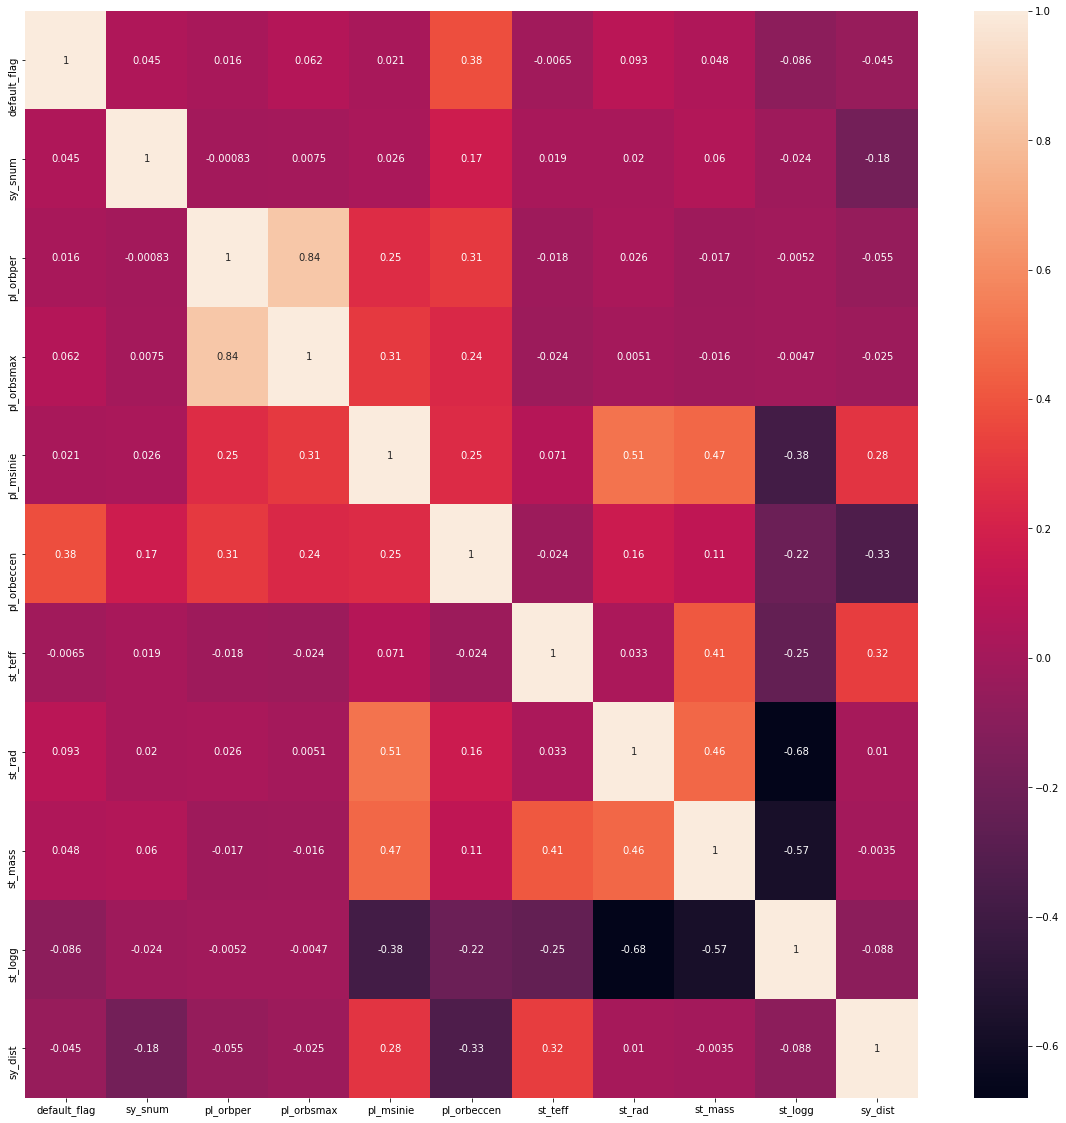

In [48]:
### Visualization
import seaborn as sns
corr = X.corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot = True)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


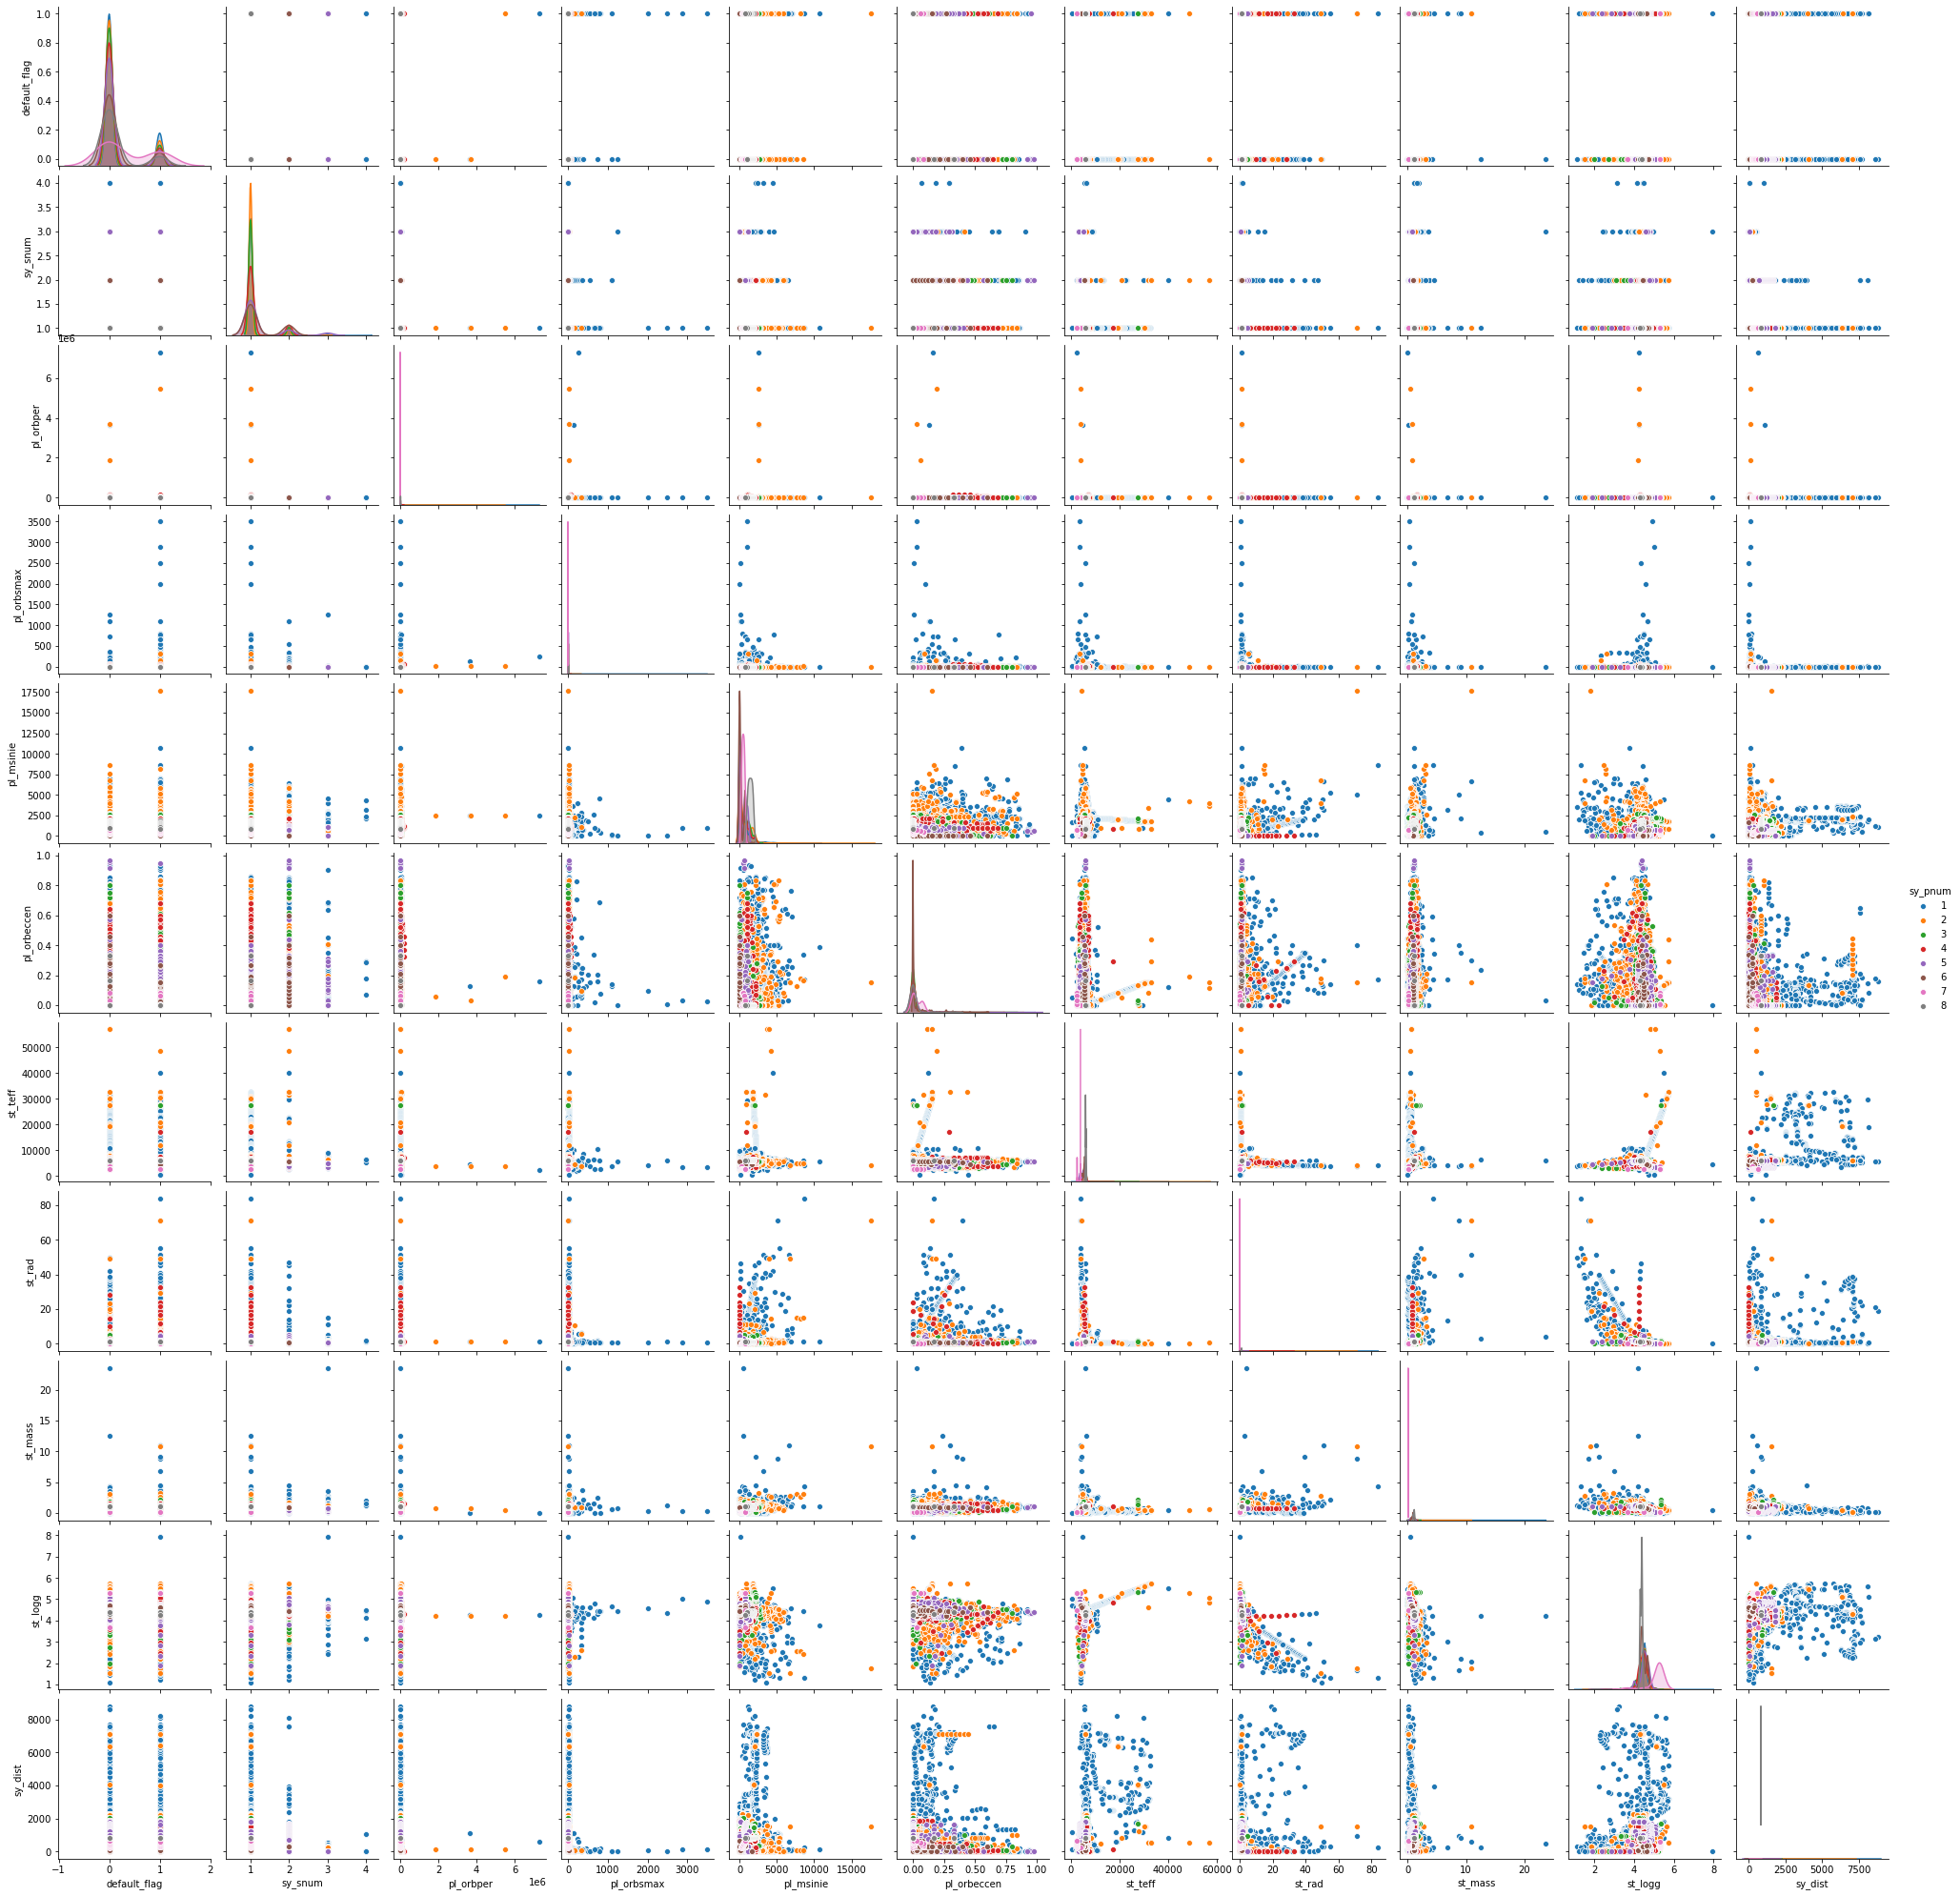

In [49]:
sns.pairplot(new_df2,hue = 'sy_pnum')

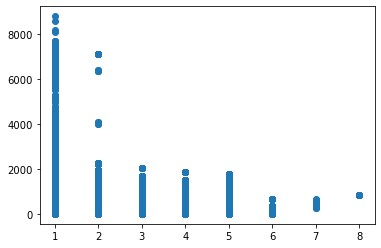

In [50]:
plt.scatter(new_df2['sy_pnum'],new_df2['sy_dist'])

No handles with labels found to put in legend.


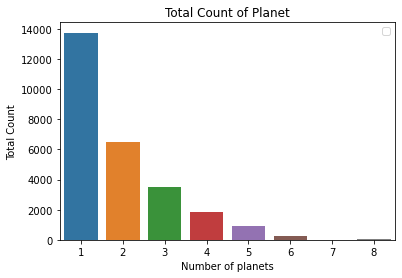

In [51]:
sns.countplot(x ='sy_pnum',data =  new_df2)
plt.xlabel('Number of planets')
plt.ylabel('Total Count')
plt.title('Total Count of Planet')
plt.legend()
plt.show()

No handles with labels found to put in legend.


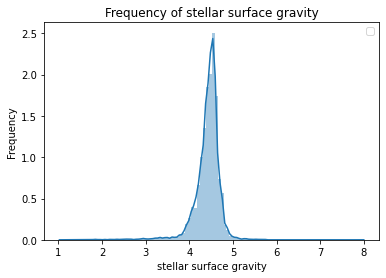

In [52]:
sns.distplot(new_df2['st_logg'],bins=100,kde = True)
plt.xlabel('stellar surface gravity')
plt.ylabel('Frequency')
plt.title('Frequency of stellar surface gravity')
plt.legend()
plt.show()

No handles with labels found to put in legend.


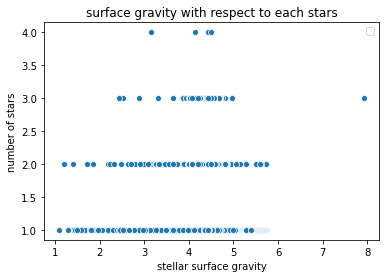

In [53]:
sns.scatterplot(data = new_df2, x = "st_logg", y = "sy_snum")
plt.xlabel('stellar surface gravity')
plt.ylabel('number of stars')
plt.title('surface gravity with respect to each stars')
plt.legend()
plt.show()

In [54]:
from pandas_profiling import ProfileReport
profile = ProfileReport(new_df2,title = 'flight price model profile',html = {'style':{'full_width':True}})

In [55]:
profile

### converting the data into new CSV format for furthur analysis 

In [61]:
new_df2

default_flag  sy_snum  sy_pnum  discoverymethod    pl_orbper  \
0                 1        2        1                8   326.030000   
1                 0        2        1                8   389.426657   
2                 0        1        1                8   452.823313   
3                 1        1        1                8   516.219970   
4                 0        1        1                8   516.220000   
...             ...      ...      ...              ...          ...   
26821             1        2        3                8  1276.460000   
26822             0        2        3                8  1319.000000   
26823             0        2        3                8  1278.100000   
26824             1        1        1                8   136.750000   
26825             0        1        1                8   136.750000   

       pl_orbsmax  pl_msinie  pl_orbeccen      st_teff     st_rad  st_mass  \
0         1.29000  6165.6000     0.231000  4742.000000  19.000000    2.700   
1         1.21000  5434.7000     0.180667  4565.666667  22.596667    2.600   
2         1.51000  3432.4000     0.130333  4389.333333  26.193333    1.700   
3         1.53000  4684.8142     0.080000  4213.000000  29.790000    2.780   
4         1.54000  3337.0700     0.080000  4340.000000  24.080000    1.800   
...           ...        ...          ...          ...        ...      ...   
26821     2.51329  1313.2200     0.298700  6105.510000   1.560000    1.300   
26822     2.57000  1255.3800     0.269000  6105.510000   1.600000    1.225   
26823     2.53000  1312.6379     0.267000  6105.510000   1.640000    1.150   
26824     0.68000   890.0000     0.000000  4780.000000  12.000000    2.200   
26825     0.58000   642.0000     0.000000  4780.000000  12.000000    1.400   

        st_logg   sy_dist  
0      2.310000   93.1846  
1      2.183333   93.1846  
2      2.056667  125.3210  
3      1.930000  125.3210  
4      1.600000  125.3210  
...         ...       ...  
26821  4.070000   13.4054  
26822  4.070000   13.4054  
26823  4.070000   13.4054  
26824  2.660000   56.1858  
26825  2.660000   56.1858  

[26826 rows x 13 columns]

In [62]:
new_df2.to_csv (r'C:\Users\user\OneDrive\Desktop\FINAL_THESIS\Updated_planet.csv', index = False, header=True)

### Furthur Analysis will be carried out in NOTEBOOK-2